<a href="https://colab.research.google.com/github/gugamainchein/Data-Science-Auditoria-VMs/blob/master/analise_de_maquinas_virtuais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# **AUDITORIA DE MÁQUINAS VIRTUAIS**
***

# **1. Conhecendo os Dados**
***

## **1.1 Dataset do projeto**
***

### CMDB de Máquinas Virtuais

O CMDB de máquinas virtuais investiga, a cada consulta, o registro de VMs nos virtualizadores e na monitoração. Além disso <b>realiza o crosscheck entre as bases de dados</b> para verificar o que há de igual e diferente entre elas.

### Fontes de Dados

https://drive.google.com/file/d/1lfH3qUIr9W0d16NFNHzaKIaaMloq1C2X/view?usp=sharing

### Variáveis Utilizadas

> ### Grupo de Clientes
> ***

Verificação da frequência de aparições de clientes por status de máquinas monitoradas.

> ### Grupo de Hosts
> ***

Verificação da frequência de aparições dos Hosts por status de máquinas monitoradas.

> ### Licenças de SO
> ***

Análise do consumo de licenças de sistemas operacionais Windows, contratadas por Hosts.

### Importando pandas e lendo o dataset do projeto

In [14]:
# Importando as bibliotecas Python
import pandas as pd
import numpy as np

# Armazenando a resposta no formato JSON
df_clientes = pd.read_csv('servidores.csv', sep = ";")

# Imprimindo os 10 primeiros valores do resultado
df_clientes.head(10)

,Empresa_Aleatória,Monitoração,Sistema_Operacional,Host
0,SO PNEUS,MONITORADO,Red Hat Enterprise Linux 5 (64-bit),SF-VMW-CFX20
1,IMC SASTE,MONITORADO,Microsoft Windows Server 2012 (64-bit),SF-VMW-CFX20
2,TRADEMASTER,MONITORADO,Microsoft Windows Server 2008 R2 (64-bit),SF-VMW-CFX35
3,SO PNEUS,MONITORADO,Microsoft Windows Server 2008 (64-bit),SF-VMW-CFX83
4,SO PNEUS,MONITORADO,Red Hat Enterprise Linux 6 (64-bit),SF-VMW-CFX84
5,TRADEMASTER,MONITORADO,Microsoft Windows Server 2012 (64-bit),SF-VMW-CFX35
6,UNIMAR SCC,MONITORADO,Microsoft Windows Server 2008 R2 (64-bit),SF-VMW-CFX84
7,ALEATÓRIO,MONITORADO,Red Hat Enterprise Linux 5 (64-bit),SF-VMW-CFX35
8,PLANO & PLANO,MONITORADO,Red Hat Enterprise Linux 6 (64-bit),SF-VMW-CFX83
9,PLANO & PLANO,MONITORADO,Red Hat Enterprise Linux 6 (64-bit),SF-VMW-CFX84


## **1.2 Tipos de Dados**
***

### Variáveis qualitativas nominais

► Variáveis que não podem ser ordenadas ou hierarquizardas

In [15]:
df_clientes['Empresa_Aleatória'].head()

0       SO PNEUS 
1      IMC SASTE 
2    TRADEMASTER 
3       SO PNEUS 
4       SO PNEUS 
Name: Empresa_Aleatória, dtype: object

In [16]:
df_clientes['Monitoração'].head()

0    MONITORADO
1    MONITORADO
2    MONITORADO
3    MONITORADO
4    MONITORADO
Name: Monitoração, dtype: object

In [17]:
df_clientes['Sistema_Operacional'].head()

0          Red Hat Enterprise Linux 5 (64-bit)
1       Microsoft Windows Server 2012 (64-bit)
2    Microsoft Windows Server 2008 R2 (64-bit)
3       Microsoft Windows Server 2008 (64-bit)
4          Red Hat Enterprise Linux 6 (64-bit)
Name: Sistema_Operacional, dtype: object

In [18]:
df_clientes['Host'].head()

0    SF-VMW-CFX20
1    SF-VMW-CFX20
2    SF-VMW-CFX35
3    SF-VMW-CFX83
4    SF-VMW-CFX84
Name: Host, dtype: object

# **2. Distribuição de Frequência**

## **2.1. Grupo de Clientes:**
***

Verificação da frequência de aparições de clientes por status de máquinas monitoradas.

**No formato de DataFrames:**

In [19]:
# Importando as biblioteca Python
import seaborn as sns

# Filtrando por uma condição dentro do DataFrame
clientes_nao_mon = df_clientes.query("Monitoração=='NAO_MON'")
clientes_mon = df_clientes.query("Monitoração=='MONITORADO'")

# Contador de frequências de clientes
fq_clientes_nao_mon = clientes_nao_mon.Empresa_Aleatória.value_counts()
fq_clientes_mon = clientes_mon.Empresa_Aleatória.value_counts()

# Criando DataFrame de clientes não monitorados
df_clientes_nao_mon = pd.DataFrame(fq_clientes_nao_mon)
df_clientes_nao_mon.columns = ['Contagem']
df_clientes_nao_mon['Cliente'] = df_clientes_nao_mon.index
df_clientes_nao_mon.reset_index(drop = True, inplace = True)
df_clientes_nao_mon = df_clientes_nao_mon[['Cliente', 'Contagem']]
print('\nGrupo de Clientes Não Monitorados\n', df_clientes_nao_mon)

# Criando DataFrame de clientes monitorados
df_clientes_mon = pd.DataFrame(fq_clientes_mon)
df_clientes_mon.columns = ['Contagem']
df_clientes_mon['Cliente'] = df_clientes_mon.index
df_clientes_mon.reset_index(drop = True, inplace = True)
df_clientes_mon = df_clientes_mon[['Cliente', 'Contagem']]
print('\nGrupo de Clientes Monitorados\n', df_clientes_mon)


Grupo de Clientes Não Monitorados
          Cliente  Contagem
0      ALEATÓRIO       203
1    SEM_CLIENTE        31
2       LEVEROS         10
3         TENDA          9
4      MANPOWER          8
..           ...       ...
86      JEROVIA          1
87        INPAO          1
88        NOKIA          1
89  LOJAS LEBES          1
90       HUGPAY          1

[91 rows x 2 columns]

Grupo de Clientes Monitorados
            Cliente  Contagem
0        ALEATÓRIO       135
1          PROPAY         92
2       DELLA VIA         64
3           NOKIA         45
4      SEM_CLIENTE        43
..             ...       ...
173      EBMPAPST          1
174   ISO SERVICE          1
175         SELCO          1
176     DISMARINA          1
177  TERRAS ALTAS          1

[178 rows x 2 columns]


**No formato de Gráficos:**

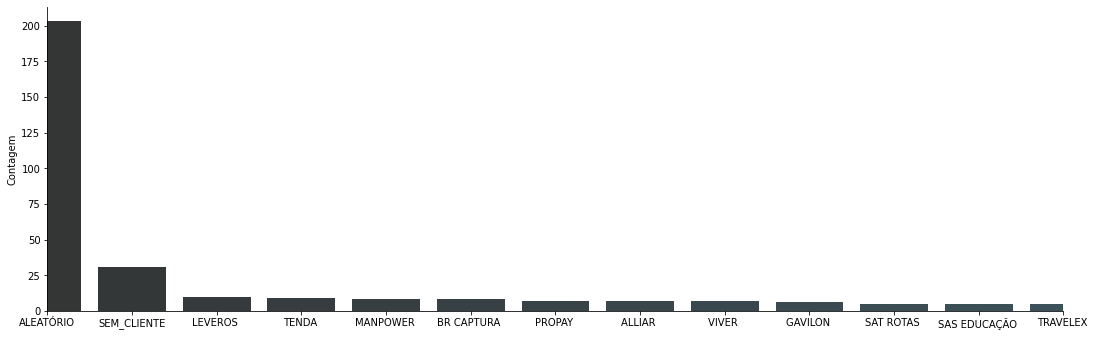

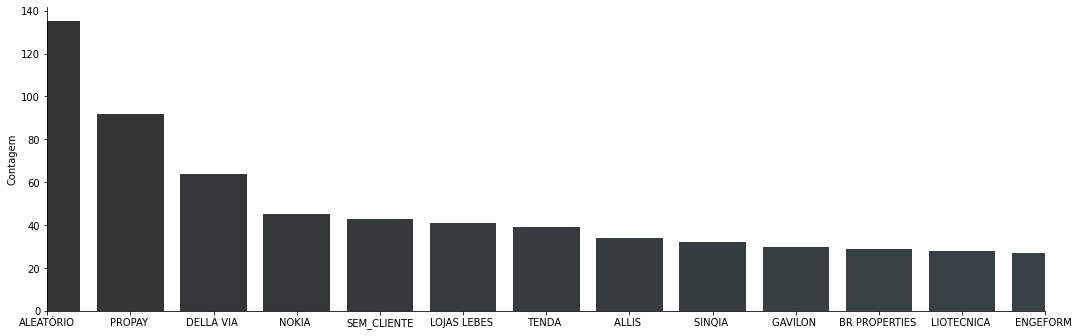

In [20]:
# Apresentando os gráficos
grafico_clientes_nao_mon = sns.catplot(x = "Empresa_Aleatória", kind="count",
                               data = clientes_nao_mon,
                               aspect = 3,
                               order = fq_clientes_nao_mon.index,
                               palette = "GnBu_d")

grafico_clientes_mon = sns.catplot(x = "Empresa_Aleatória", kind="count",
                               data = clientes_mon,
                               aspect = 3,
                               order = fq_clientes_mon.index,
                               palette = "GnBu_d")

# Limitando exibição no eixo x
grafico_clientes_nao_mon.set(xlim=(0, 12))
grafico_clientes_mon.set(xlim=(0, 12))

# Definindo legenda vertical
grafico_clientes_nao_mon.set_axis_labels("", "Contagem")
grafico_clientes_mon.set_axis_labels("", "Contagem")

# Definindo o título do gráfico
grafico_clientes_nao_mon.set_titles("Grupos de Clientes Não Monitorados")
grafico_clientes_mon.set_titles("Grupos de Clientes Monitorados")

## **2.2. Grupo de Hosts:**
***

Verificação da frequência de aparições dos Hosts por status de máquinas monitoradas.

**No formato de DataFrames:**

In [21]:
# Importando as biblioteca Python
import seaborn as sns

# Filtrando por uma condição dentro do DataFrame
hosts_nao_mon = df_clientes.query("Monitoração=='NAO_MON'")
hosts_mon = df_clientes.query("Monitoração=='MONITORADO'")

# Contador de frequências de clientes
fq_hosts_nao_mon = hosts_nao_mon.Host.value_counts()
fq_hosts_mon = hosts_mon.Host.value_counts()

# Criando DataFrame de clientes não monitorados
df_hosts_nao_mon = pd.DataFrame(fq_hosts_nao_mon)
df_hosts_nao_mon.columns = ['Contagem']
df_hosts_nao_mon['Cliente'] = df_hosts_nao_mon.index
df_hosts_nao_mon.reset_index(drop = True, inplace = True)
df_hosts_nao_mon = df_hosts_nao_mon[['Cliente', 'Contagem']]
print('\nGrupo de Hosts Não Monitorados\n', df_hosts_nao_mon)

# Criando DataFrame de clientes monitorados
df_hosts_mon = pd.DataFrame(fq_hosts_mon)
df_hosts_mon.columns = ['Contagem']
df_hosts_mon['Cliente'] = df_hosts_mon.index
df_hosts_mon.reset_index(drop = True, inplace = True)
df_hosts_mon = df_hosts_mon[['Cliente', 'Contagem']]
print('\nGrupo de Hosts Monitorados\n', df_hosts_mon)


Grupo de Hosts Não Monitorados
                           Cliente  Contagem
0                    SF-VMW-EQX04        12
1    SF-KVM-EQX04.CORPFLEX.COM.BR        10
2    SF-KVM-TMK15.CORPFLEX.COM.BR        10
3    SF-KVM-EQX32.CORPFLEX.COM.BR        10
4                    SF-VMW-CFX17        10
..                            ...       ...
109                  SF-VMW-CFX75         1
110                  SF-VMW-CFX53         1
111                  SF-VMW-CFX71         1
112                  SF-VMW-CFX15         1
113  SF-KVM-EQX51.CORPFLEX.COM.BR         1

[114 rows x 2 columns]

Grupo de Hosts Monitorados
                           Cliente  Contagem
0                    SF-VMW-CFX13        33
1                    SF-VMW-EQX51        31
2                    SF-VMW-CFX35        31
3                    SF-VMW-CFX58        31
4    SF-KVM-EQX05.CORPFLEX.COM.BR        30
..                            ...       ...
130                  SF-VMW-LEB02         1
131  SF-KVM-TMK02.CORPFLEX.COM.BR 

**No formato de Gráficos:**

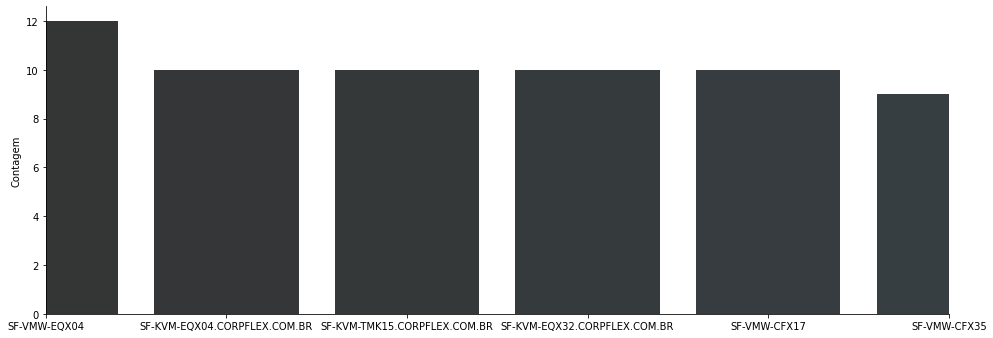

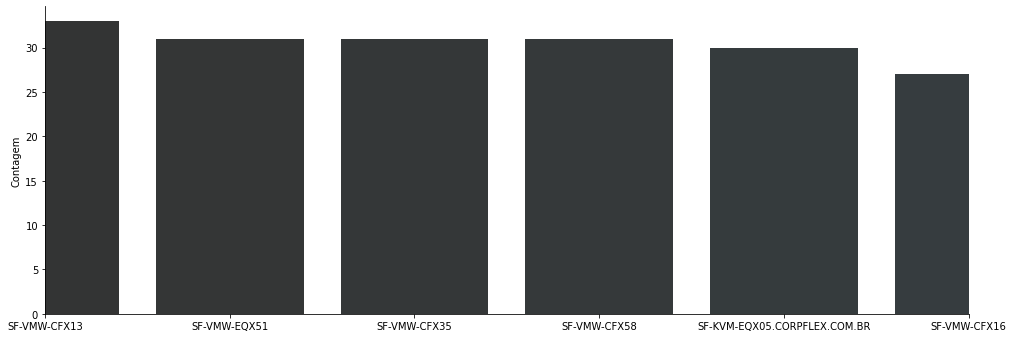

In [27]:
# Apresentando os gráficos
grafico_hosts_nao_mon = sns.catplot(x = "Host", kind="count",
                               data = hosts_nao_mon,
                               aspect = 3,
                               order = fq_hosts_nao_mon.index,
                               palette = "GnBu_d")

grafico_hosts_mon = sns.catplot(x = "Host", kind="count",
                               data = hosts_mon,
                               aspect = 3,
                               order = fq_hosts_mon.index,
                               palette = "GnBu_d")

# Limitando exibição no eixo x
grafico_hosts_nao_mon.set(xlim=(0, 5))
grafico_hosts_mon.set(xlim=(0, 5))

# Definindo legenda vertical
grafico_hosts_nao_mon.set_axis_labels("", "Contagem")
grafico_hosts_mon.set_axis_labels("", "Contagem")

## **2.3. Licenças de S.O.:**
***

Análise do consumo de licenças de sistemas operacionais Windows, contratadas por Hosts.

In [33]:
# Variável de escolha do Cliente
cliente = 'ALEATÓRIO'
sistema = 'Windows'

# Criando array de sistemas operacionais
windows_so = []

# Percorrendo laço de repetição
for i in range(0, len(df_clientes)):
  # Criando array de sistemas operacionais no laço
  row = []

  # Condições para append
  if df_clientes['Sistema_Operacional'].astype(str).apply(lambda x: x[:3])[i] == 'Win':
    row.append('Windows')
    row.append(df_clientes['Empresa_Aleatória'][i])
    row.append(df_clientes['Monitoração'][i])
    row.append(df_clientes['Host'][i])
  elif df_clientes['Sistema_Operacional'].astype(str).apply(lambda x: x[:9])[i] == 'Microsoft':
    row.append('Windows')
    row.append(df_clientes['Empresa_Aleatória'][i])
    row.append(df_clientes['Monitoração'][i])
    row.append(df_clientes['Host'][i])
  else:
    row.append('Outros')
    row.append(df_clientes['Empresa_Aleatória'][i])
    row.append(df_clientes['Monitoração'][i])
    row.append(df_clientes['Host'][i])

  # Acrescentando valores no array de sistemas operacionais
  windows_so.append(row)

# Criando DataFrame a partir dos dados inseridos no laço
df_windows = pd.DataFrame(data = windows_so, columns = ['SO',
                                                        'Cliente',
                                                        'Status',
                                                        'Host'])

# Filtrando os valores
hosts_nao_mon_qtd = df_windows.query(f"Cliente == '{cliente}'").query(f"SO == '{sistema}'").query("Status == 'NAO_MON'").Host.value_counts()
print(f'Hosts com máquinas Windows não monitoradas para o cliente {cliente}:', sum(hosts_nao_mon_qtd))

hosts_mon_qtd = df_windows.query(f"Cliente == '{cliente}'").query(f"SO == '{sistema}'").query("Status == 'MONITORADO'").Host.value_counts()
print(f'\nHosts com máquinas Windows monitoradas para o cliente {cliente}:', sum(hosts_mon_qtd))

Hosts com máquinas Windows não monitoradas para o cliente ALEATÓRIO: 63

Hosts com máquinas Windows monitoradas para o cliente ALEATÓRIO: 100


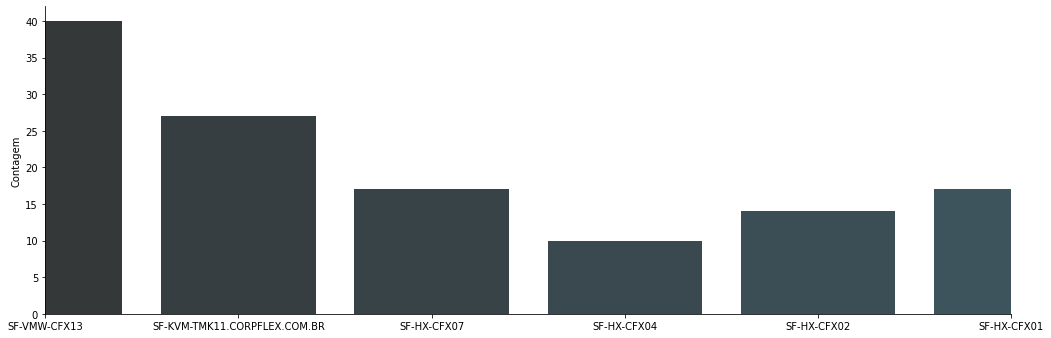

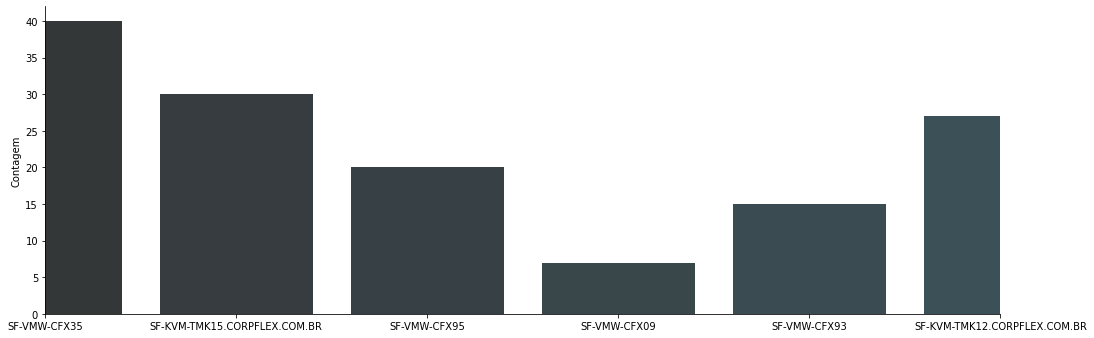

In [34]:
# Apresentando os gráficos
grafico_hosts_nao_mon = sns.catplot(x = "Host", kind="count",
                               data = df_windows,
                               aspect = 3,
                               order = hosts_nao_mon_qtd.index,
                               palette = "GnBu_d")

grafico_hosts_mon = sns.catplot(x = "Host", kind="count",
                               data = df_windows,
                               aspect = 3,
                               order = hosts_mon_qtd.index,
                               palette = "GnBu_d")

# Limitando exibição no eixo x
grafico_hosts_nao_mon.set(xlim=(0, 5))
grafico_hosts_mon.set(xlim=(0, 5))

# Definindo legenda vertical
grafico_hosts_nao_mon.set_axis_labels("", "Contagem")
grafico_hosts_mon.set_axis_labels("", "Contagem")

# **3. Medidas de Tendência Central**

## **3.1. Média aritmética**
***

In [35]:
# Analisando a média dos servidores [monitorados, não monitorados]
media_servidores = [fq_clientes_mon.mean(), fq_clientes_nao_mon.mean()]
media_hosts = [fq_hosts_mon.mean(), fq_hosts_nao_mon.mean()]
media_hosts_cliente = [hosts_mon_qtd.mean(), hosts_nao_mon_qtd.mean()]

print('Média dos Servidores Monitorados: %.2f' % media_servidores[0],
      '\nMédia dos Servidores Não Monitorados: %.2f' % media_servidores[1],
      '\n\nMédia dos Hosts Monitorados: %.2f' % media_hosts[0],
      '\nMédia dos Hosts Não Monitorados: %.2f' % media_hosts[1],
      f'\n\n({cliente}) -> Média dos Hosts Windows Monitorados: %.2f' % media_hosts_cliente[0],
      f'\n({cliente}) -> Média dos Hosts Windows Não Monitorados: %.2f' % media_hosts_cliente[1])

Média dos Servidores Monitorados: 9.72 
Média dos Servidores Não Monitorados: 4.79 

Média dos Hosts Monitorados: 12.81 
Média dos Hosts Não Monitorados: 3.82 

(ALEATÓRIO) -> Média dos Hosts Windows Monitorados: 2.27 
(ALEATÓRIO) -> Média dos Hosts Windows Não Monitorados: 1.66


## **3.2. Mediana**
***

In [36]:
# Analisando a média dos servidores [monitorados, não monitorados]
mediana_servidores = [fq_clientes_mon.median(), fq_clientes_nao_mon.median()]
mediana_hosts = [fq_hosts_mon.median(), fq_hosts_nao_mon.median()]
mediana_hosts_cliente = [hosts_mon_qtd.median(), hosts_nao_mon_qtd.median()]

print('Mediana dos Servidores Monitorados: %.2f' % mediana_servidores[0],
      '\nMediana dos Servidores Não Monitorados: %.2f' % mediana_servidores[1],
      '\n\nMediana dos Hosts Monitorados: %.2f' % mediana_hosts[0],
      '\nMediana dos Hosts Não Monitorados: %.2f' % mediana_hosts[1],
      f'\n\n({cliente}) -> Mediana dos Hosts Windows Monitorados: %.2f' % mediana_hosts_cliente[0],
      f'\n({cliente}) -> Mediana dos Hosts Windows Não Monitorados: %.2f' % mediana_hosts_cliente[1])

Mediana dos Servidores Monitorados: 4.00 
Mediana dos Servidores Não Monitorados: 1.00 

Mediana dos Hosts Monitorados: 13.00 
Mediana dos Hosts Não Monitorados: 3.00 

(ALEATÓRIO) -> Mediana dos Hosts Windows Monitorados: 2.00 
(ALEATÓRIO) -> Mediana dos Hosts Windows Não Monitorados: 1.00


## **3.3. Visualização Gráfica**
***

Text(0.5, 1.0, 'Distribução das Médias de Servidores')

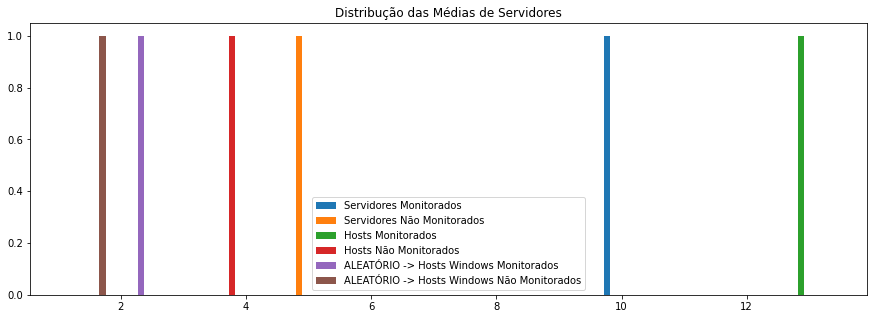

In [37]:
import matplotlib.pyplot as plt

# Verificando a distribuição desses dados
plt.figure(figsize=(15, 5))
plt.hist(media_servidores[0])
plt.hist(media_servidores[1])
plt.hist(media_hosts[0])
plt.hist(media_hosts[1])
plt.hist(media_hosts_cliente[0])
plt.hist(media_hosts_cliente[1])
plt.legend(['Servidores Monitorados', 'Servidores Não Monitorados',
            'Hosts Monitorados', 'Hosts Não Monitorados',
            f'{cliente} -> Hosts Windows Monitorados',
            f'{cliente} -> Hosts Windows Não Monitorados'])
plt.title('Distribução das Médias de Servidores')

Text(0.5, 1.0, 'Distribução das Médias de Servidores e Visualização da Mediana')

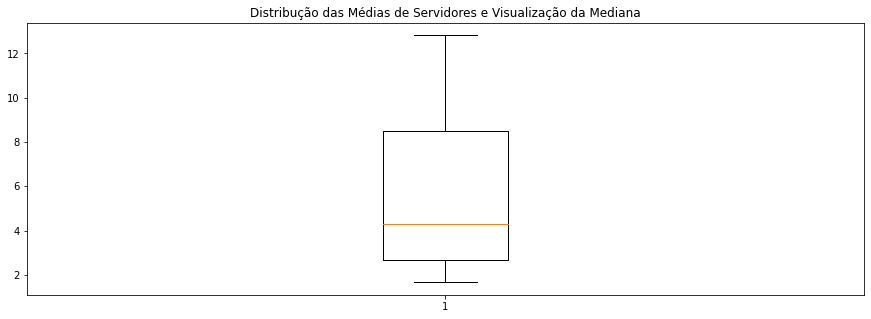

In [38]:
plt.figure(figsize=(15, 5))
plt.boxplot([media_servidores[0],
             media_servidores[1],
             media_hosts[0],
             media_hosts[1],
             media_hosts_cliente[0],
             media_hosts_cliente[1]])
plt.title('Distribução das Médias de Servidores e Visualização da Mediana')